In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
from sympy import diff, Symbol
import sympy.parsing.sympy_parser

Minimum value: [0.44149441]
Minimum point: [-0.03805795 -0.00320828]
Equation: (4.47*x1**2) + (6.06*x2**2) + (0.04*x2) + (0.45)


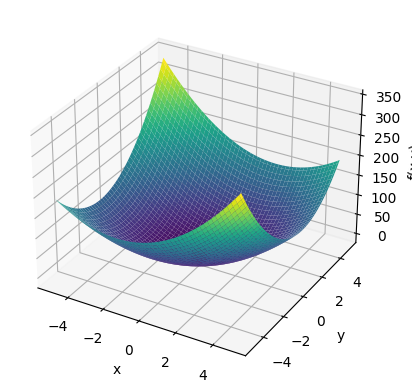

In [ ]:
def gradient_descent(function, gradient, initial_position, learning_rate=0.1, tol=1e-6, max_iter=1000):
    history = [initial_position]
    value = function(initial_position)
    grad_norm = np.inf
    step = 1
    while grad_norm > tol and step < max_iter:
        gradient_ = gradient(history[-1])
        grad_norm = np.linalg.norm(gradient_)
        new_position = history[-1] - learning_rate * gradient_
        new_value = function(new_position)
        if new_value < value:
            history.append(new_position)
            value = new_value
        else:
            learning_rate /= 2
        step += 1
    return value, history 

def generate_quadratic_function(n, condition_number):
    # генерация случайной матрицы A размера n x n с заданным числом обусловленности
    U, s, V = np.linalg.svd(np.random.rand(n, n))
    S = np.diag(np.linspace(1, condition_number, n))
    A = U @ S @ V.T
    #print(A)

    A_inv = np.linalg.inv(A)
    #print("Норма матрицы A:", np.linalg.norm(A))
    #print("Норма обратной матрицы A^-1:", np.linalg.norm(A_inv))
    cond = np.linalg.norm(A) * np.linalg.norm(A_inv)
    #print("Число обусловленности матрицы A:", cond)
    
    # генерация случайного вектора b размера n x 1
    b = np.random.rand(n, 1)
    #print(b)
    
    # генерация случайного скаляра c
    c = np.random.rand()
    #print(c)
    
    # определение функции f(x) для полученных параметров
    def f(x):
      res = 0
      for i in range(n):
        res += A[i,i]*x[i]**2 + b[i]*x[i]
        for j in range(i+1, n):
          res += A[i,j]*x[i]*x[j]
      res += c
      return res
    
    # определение производных функции по каждой переменной
    def df(x):
      res = np.zeros(n)
      for i in range(n):
        res[i] = 2*A[i,i]*x[i] + b[i]
        for j in range(i+1, n):
          res[i] += A[i,j]*x[j] + A[j,i]*x[j]
      return res
    
    # вывод полученной функции
    equation = f'({ A[0,0]:.2f}*x{0+1}**2) '
    for i in range(1, n):
      equation += f'+ ({ A[i,i]:.2f}*x{i+1}**2) '
      for j in range(i+1, n):
        equation += f'+ ({A[i,j]:.2f}*x{i+1}*x{j+1}) '
      equation += f'+ ({b[i,0]:.2f}*x{i+1}) '
    equation += f'+ ({c:.2f})'
    
    return f, df, str(equation)

# Задаем размерность и число обусловленности матрицы.
n = 2
condition_number = 10

# Генерируем квадратичную функцию и ее производные.
f, df, equation = generate_quadratic_function(n, condition_number)

# Задаем начальную точку.
x_init = np.random.rand(n)

# Вызываем функцию Gradient Descent.
min_val, history = gradient_descent(f, df, x_init)

# Выводим результаты.
print("Minimum value:", min_val)
print("Minimum point:", history[-1])
print("Equation:", equation)

# Рисуем график функции и ее минимум.
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x_vals = np.linspace(-5, 5, 100)
y_vals = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x_vals, y_vals)
Z = f([X, Y])

ax.plot_surface(X, Y, Z, cmap='viridis')
ax.scatter(history[-1][0], history[-1][1], min_val, color='r', s=100)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y)')

plt.show()

<ipython-input-3-7da7ca9e55ca>:44: RuntimeWarning: overflow encountered in double_scalars
  res += A[i,i]*x[i]**2 + b[i]*x[i]
<ipython-input-3-7da7ca9e55ca>:46: RuntimeWarning: overflow encountered in double_scalars
  res += A[i,j]*x[i]*x[j]
<ipython-input-3-7da7ca9e55ca>:46: RuntimeWarning: invalid value encountered in add
  res += A[i,j]*x[i]*x[j]


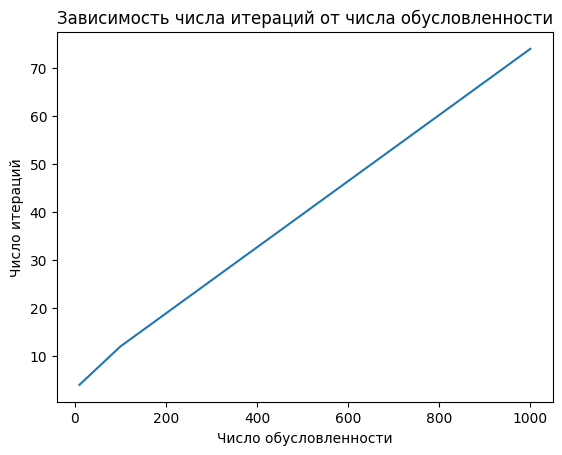

<ipython-input-3-7da7ca9e55ca>:46: RuntimeWarning: overflow encountered in add
  res += A[i,j]*x[i]*x[j]
<ipython-input-3-7da7ca9e55ca>:44: RuntimeWarning: overflow encountered in add
  res += A[i,i]*x[i]**2 + b[i]*x[i]


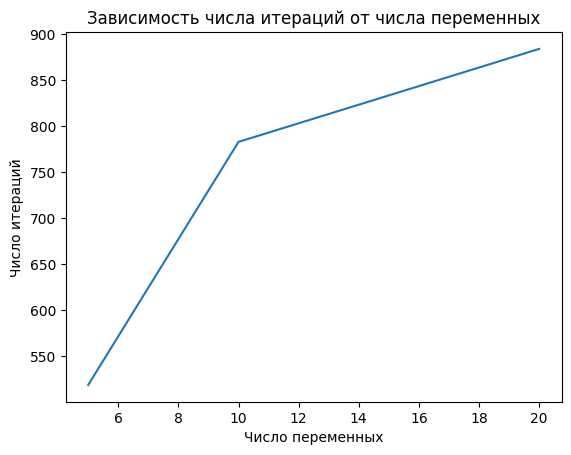

In [ ]:
# Задаем размерность и число обусловленности матрицы.
n = 2
condition_numbers = [10, 100, 1000]
iterations = []
conds = []

for cond in condition_numbers:
    # Генерируем квадратичную функцию и ее производные.
    f, df, equation = generate_quadratic_function(n, cond)

    # Задаем начальную точку.
    x_init = np.random.rand(n)

    # Вызываем функцию Gradient Descent.
    min_val, history = gradient_descent(f, df, x_init)

    # Добавляем результаты в соответствующие списки.
    iterations.append(len(history)-1)
    conds.append(cond)

# Рисуем график зависимости числа обусловленностей от числа итераций.
plt.plot(conds, iterations)
plt.xlabel('Число обусловленности')
plt.ylabel('Число итераций')
plt.title('Зависимость числа итераций от числа обусловленности')
plt.show()


# Задаем размерность матрицы и список чисел переменных.
n_list = [5, 10, 20]
iterations = []

for n in n_list:
    # Генерируем квадратичную функцию и ее производные.
    f, df, equation = generate_quadratic_function(n, 10)
    # Задаем начальную точку.
    x_init = np.random.rand(n)

    # Вызываем функцию Gradient Descent.
    min_val, history = gradient_descent(f, df, x_init)

    # Добавляем результаты в соответствующий список.
    iterations.append(len(history)-1)

# Рисуем график зависимости числа переменных от количества итераций.
plt.plot(n_list, iterations)
plt.xlabel('Число переменных')
plt.ylabel('Число итераций')
plt.title('Зависимость числа итераций от числа переменных')
plt.show()